In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice
import stylecloud
from PIL import Image

## Read from CSV

In [2]:
data = pd.read_csv(r'profileScraperMAIN.csv', encoding='utf-8')
data = data.replace(np.nan, 'NO ENTRY', regex=True)
data.drop_duplicates(subset = "linkedinProfile", keep = "first", inplace = True) # keep the 1st instance of the duplicate
data = data.iloc[:, [3,19, 21, 23, 25, 28, 45, 46, 48, 50]]
data.head(10)

,headline,company,jobTitle,school,school2,allSkills,company2,jobTitle2,schoolDegree,schoolDegree2
0,Ngee Ann Polytechnic,Vieworks,Sales And Marketing Representative,Ngee Ann Polytechnic,Republic Polytechnic,"Sales Management, Marketing, Business Developm...",NO ENTRY,NO ENTRY,NO ENTRY,NO ENTRY
1,General Education Officer at Ministry of Educa...,"Ministry of Education, Singapore",General Education Officer,Nanyang Technological University Singapore,National University of Singapore,"Teaching, Curriculum Design, Teacher Training,...",Stepping Stone Student Care,Teacher,"Postgraduate Diploma in Education (Merit), His...","Bachelor of Arts, History, English Studies, Ch..."
2,--,IPC Group Singapore,Business Development Executive,NO ENTRY,NO ENTRY,NO ENTRY,NO ENTRY,NO ENTRY,NO ENTRY,NO ENTRY
3,ServiceNow Analyst at Nanyang Technological Un...,Institute of High Performance Computing (IHPC),Research Engineer,Singapore Management University,Anglo-Chinese Junior College,"Communication, Leadership, Adobe Illustrator, ...",Nanyang Technological University,ServiceNow Analyst,"Bachelor's degree, Smart-City Management and T...",NO ENTRY
4,Data Enthusiast | SMU Undergraduate | Smart Ci...,Conversion Hub,Project Intern,Singapore Management University,Temasek Junior College,"Python (Programming Language), Negotiation, Ac...",SingHealth,Patient Service Associate,"Bachelor of Science - BS, Smart City Managemen...",NO ENTRY
5,Talent Sourcer - Tech & PM | Join Us!,Shopee,"Associate, People Team",RMIT University,Temasek Polytechnic,NO ENTRY,PERSOLKELLY Singapore,Recruitment Consultant,"Bachelor's degree, Business Management","Diploma, Integrated Facilities Management"
6,Student at Singapore Management University,OCBC Bank,GT - Business Process Transformation,Singapore Management University,Temasek Polytechnic,"Flexsim, Python (Programming Language), HTML, ...",Singapore Management University,Teaching Assistant (Digital Business),"Bachelor of Science - BS, Information Systems",Diploma in Business Process and Systems Engine...
7,🌻,UBS,Data & Document Specialist,National University of Singapore,NO ENTRY,NO ENTRY,NO ENTRY,NO ENTRY,"Bachelor of Science (Hons.), Statistics with S...",NO ENTRY
8,Student at Singapore Management University,Unimas Consulting Solutions,Project Intern,Singapore Management University,Nanyang Polytechnic,"Front-end Coding, Back-End Web Development, Da...",Accenture,Associate Software Engineer,"Bachelor of Science (Information Systems), Sof...","Diploma, Business Enterprise in Information Te..."
9,DIY Hacker | SUTD - SMU Double Degree Undergra...,Smartcademy,Introduction to User Experience Design,Singapore University of Technology and Design ...,Singapore Management University,"Microsoft Office, Mechanical Engineering, CAD,...",Micron Technology,Test Equipment Engineer,"Bachelor of Engineering - BE, Engineering","Bachelor of Business Management - BBM, Busines..."


## Sieve out SMU Students, then SMU SCIS / SIS Students

In [3]:
searchfor = ['Singapore Management University', 'SMU', 'School of Computing and Information Systems',
             'School of Information Systems', 'SCIS', 'SIS','SMU SCIS', 'SMU SIS','SMU-SCIS', 'SMU-SIS']
latest_SMU = data[data['school'].str.contains('|'.join(searchfor))]
latest_SMU.head()

,headline,company,jobTitle,school,school2,allSkills,company2,jobTitle2,schoolDegree,schoolDegree2
3,ServiceNow Analyst at Nanyang Technological Un...,Institute of High Performance Computing (IHPC),Research Engineer,Singapore Management University,Anglo-Chinese Junior College,"Communication, Leadership, Adobe Illustrator, ...",Nanyang Technological University,ServiceNow Analyst,"Bachelor's degree, Smart-City Management and T...",NO ENTRY
4,Data Enthusiast | SMU Undergraduate | Smart Ci...,Conversion Hub,Project Intern,Singapore Management University,Temasek Junior College,"Python (Programming Language), Negotiation, Ac...",SingHealth,Patient Service Associate,"Bachelor of Science - BS, Smart City Managemen...",NO ENTRY
6,Student at Singapore Management University,OCBC Bank,GT - Business Process Transformation,Singapore Management University,Temasek Polytechnic,"Flexsim, Python (Programming Language), HTML, ...",Singapore Management University,Teaching Assistant (Digital Business),"Bachelor of Science - BS, Information Systems",Diploma in Business Process and Systems Engine...
8,Student at Singapore Management University,Unimas Consulting Solutions,Project Intern,Singapore Management University,Nanyang Polytechnic,"Front-end Coding, Back-End Web Development, Da...",Accenture,Associate Software Engineer,"Bachelor of Science (Information Systems), Sof...","Diploma, Business Enterprise in Information Te..."
10,Data Scientist at Seagate,Seagate Technology,Data Scientist,Singapore Management University,Temasek Polytechnic,"Interpersonal Skills, PHP, Problem Solving, Ta...",Seagate Technology,Data Science Intern,"Bachelor of Science (Information Systems), Bus...","Diploma in Business, Business Administration a..."


In [4]:
searchfor = ['IS', 'SMT', 'CS','Information Systems', 'Information-Systems', 'Smart-City','Smart City','Computer Science', 'Computer-Science']
IS_SMU = latest_SMU[latest_SMU['schoolDegree'].str.contains('|'.join(searchfor))]
IS_SMU.head()

,headline,company,jobTitle,school,school2,allSkills,company2,jobTitle2,schoolDegree,schoolDegree2
3,ServiceNow Analyst at Nanyang Technological Un...,Institute of High Performance Computing (IHPC),Research Engineer,Singapore Management University,Anglo-Chinese Junior College,"Communication, Leadership, Adobe Illustrator, ...",Nanyang Technological University,ServiceNow Analyst,"Bachelor's degree, Smart-City Management and T...",NO ENTRY
4,Data Enthusiast | SMU Undergraduate | Smart Ci...,Conversion Hub,Project Intern,Singapore Management University,Temasek Junior College,"Python (Programming Language), Negotiation, Ac...",SingHealth,Patient Service Associate,"Bachelor of Science - BS, Smart City Managemen...",NO ENTRY
6,Student at Singapore Management University,OCBC Bank,GT - Business Process Transformation,Singapore Management University,Temasek Polytechnic,"Flexsim, Python (Programming Language), HTML, ...",Singapore Management University,Teaching Assistant (Digital Business),"Bachelor of Science - BS, Information Systems",Diploma in Business Process and Systems Engine...
8,Student at Singapore Management University,Unimas Consulting Solutions,Project Intern,Singapore Management University,Nanyang Polytechnic,"Front-end Coding, Back-End Web Development, Da...",Accenture,Associate Software Engineer,"Bachelor of Science (Information Systems), Sof...","Diploma, Business Enterprise in Information Te..."
10,Data Scientist at Seagate,Seagate Technology,Data Scientist,Singapore Management University,Temasek Polytechnic,"Interpersonal Skills, PHP, Problem Solving, Ta...",Seagate Technology,Data Science Intern,"Bachelor of Science (Information Systems), Bus...","Diploma in Business, Business Administration a..."


In [5]:
IS_SMU.shape

(67, 10)

<AxesSubplot:title={'center':'Previous Schools before SMU SCIS'}, xlabel='Previous Schools', ylabel='Count'>

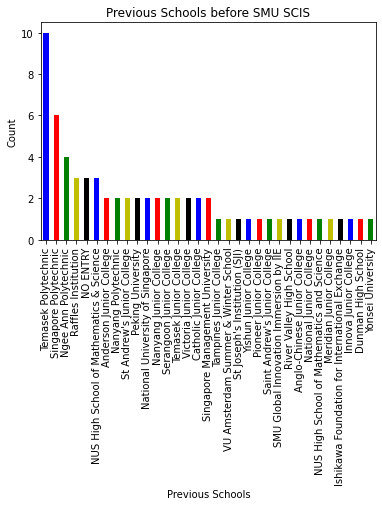

In [6]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(IS_SMU)))
IS_SMU.groupby(IS_SMU['school2'].dropna()).size().sort_values(ascending = False).plot(kind='bar', 
                                      color = my_colors, 
                                      title = 'Previous Schools before SMU SCIS',
                                      xlabel = 'Previous Schools',
                                      ylabel = 'Count')

<AxesSubplot:title={'center':'Previous Certifications before SMU SCIS'}, xlabel='Previous Certs', ylabel='Count'>

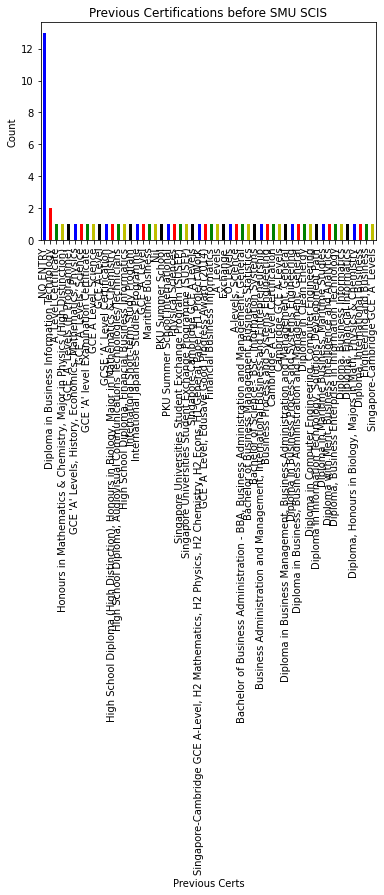

In [7]:
IS_SMU.groupby(IS_SMU['schoolDegree2'].dropna()).size().sort_values(ascending = False).plot(kind='bar', 
                                      color = my_colors, 
                                      title = 'Previous Certifications before SMU SCIS',
                                      xlabel = 'Previous Certs',
                                      ylabel = 'Count')

## Listed Skillsets

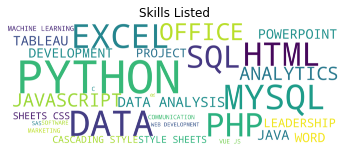

In [8]:
# Find out what skills SMU students already have
# X-Ref with Job Street
# Similarities = Push, Difference = Potential to push for outreach

stop_words = stopwords.words('english')
stop_words.extend(['programming language', 'programming', 'language', 'microsoft', 'business', 'management'])

skill_content = ''
for x in IS_SMU['allSkills']:
    if len(x.strip()) > 0: # Eliminates empty answers
        skill_content += x.upper() + ' '    
        
# Create a word cloud
my_wordcloud = WordCloud(background_color='white', max_words = 30, stopwords = stop_words,
                     width=5500,
                     height=2000).generate(skill_content)

plt.imshow(my_wordcloud)
plt.axis('off')
plt.title('Skills Listed')
plt.show()

In [9]:
#stylecloud
stop_words = stopwords.words('english')
stop_words.extend(['programming language', 'programming', 'language', 'microsoft', 'business', 'management'])

stylecloud.gen_stylecloud(skill_content,
                          icon_name = 'fas fa-desktop',
                          palette ='cartocolors.qualitative.Vivid_9',
                          background_color = 'black',
                          output_name ='skills.png',
                          collocations = False,
                          custom_stopwords = stop_words)

### References ###
## icon_name: https://fontawesome.com/
## palette: https://jiffyclub.github.io/palettable/cartocolors/qualitative/

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


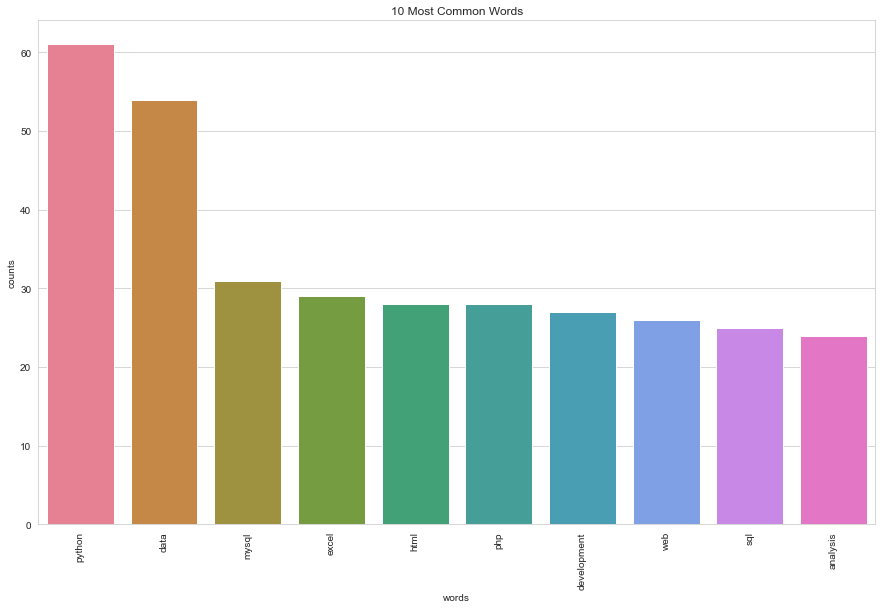

In [10]:
# Find out common words used together with Wordcloud
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

stop_words = stopwords.words('english')
stop_words.extend(['programming language', 'programming', 'language', 'microsoft', 'business', 'management'])

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 Most Common Words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=stop_words)

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(
    IS_SMU['allSkills']
)

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## SMU SCIS - Current Jobs

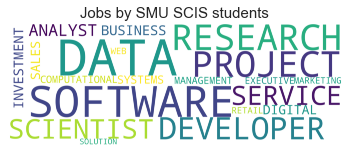

In [11]:
# Find out what jobs are mostly done by SMU students (based on latest jobs put on LinkedIn)

stop_words = stopwords.words('english')
stop_words.extend(['entry', 'crew' , 'thinking', 'system', 'intern', 
                   'teaching', 'assistant', 'associate', 'engineer',
                   'director', 'consultant', 'trainee', ' service', 
                   'instructor', 'transformation', 'process', 'executive'
                  'IS430', 'learning', 'GT'])

job_content = ''
for x in IS_SMU['jobTitle']:
    if len(x.strip()) > 0: # Eliminates empty answers
        job_content += x.upper() + ' '    
        
# Create a word cloud
my_wordcloud = WordCloud(background_color='white', max_words = 20, stopwords = stop_words,
                     width=5500,
                     height=2000).generate(job_content)

plt.imshow(my_wordcloud)
plt.axis('off')
plt.title('Jobs by SMU SCIS students')
plt.show()

In [12]:
#stylecloud
stop_words = stopwords.words('english')
stop_words.extend(['entry', 'crew' , 'thinking', 'system', 'intern', 
                   'teaching', 'assistant', 'associate', 'engineer',
                   'director', 'consultant', 'trainee', ' service', 
                   'instructor', 'transformation', 'process', 'executive'
                  'IS430', 'learning', 'GT'])

stylecloud.gen_stylecloud(job_content,
                          icon_name = 'fas fa-briefcase',
                          palette ='cartocolors.qualitative.Prism_9',
                          background_color = 'black',
                          output_name ='jobs.png',
                          collocations = False,
                          custom_stopwords = stop_words)

### References ###
## icon_name: https://fontawesome.com/
## palette: https://jiffyclub.github.io/palettable/cartocolors/qualitative/

D:\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['executiveis430', 'gt', 'service'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


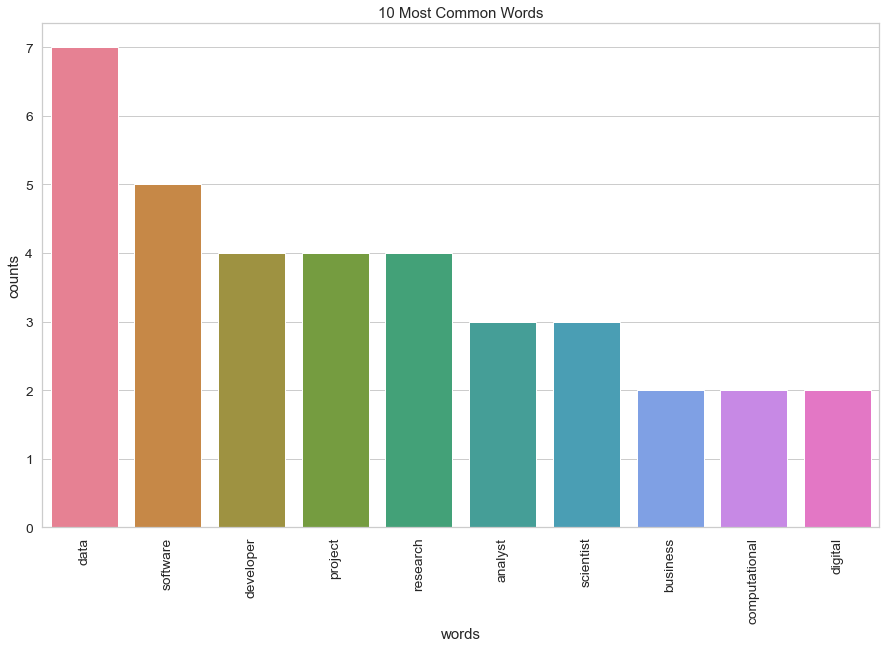

In [13]:
# Find out common words used together with Wordcloud
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

stop_words = stopwords.words('english')
stop_words.extend(['entry', 'crew' , 'thinking', 'system', 'intern', 
                   'teaching', 'assistant', 'associate', 'engineer',
                   'director', 'consultant', 'trainee', ' service', 
                   'instructor', 'transformation', 'process', 'executive'
                  'IS430', 'learning', 'GT'])

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 Most Common Words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=stop_words)

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(
    IS_SMU['jobTitle']
)

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## Previous Education - JC and Poly

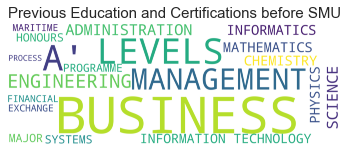

In [14]:
# See the different fields, can say very diverse and SCIS is like "friendly" in the change
stop_words = stopwords.words('english')
stop_words.extend(['no entry', 'diploma', 'diploma in', 'in', 'GCE', 'with', 
                   'merit', 'cambridge', 'international','entry','no', 'level', 
                   'singapore', 'A', "'", 'school', 'bachelor','high', 'general', 'H2'])
content = ''

for x in IS_SMU['schoolDegree2']:
    if len(x.strip()) > 0: # Eliminates empty answers
        content += x.upper() + ' '    

# Create a word cloud
my_wordcloud = WordCloud(background_color='white', max_words = 20, stopwords = stop_words,
                     width=5500,
                     height=2000).generate(content)

plt.imshow(my_wordcloud)
plt.axis('off')
plt.title('Previous Education and Certifications before SMU')
plt.show()

In [15]:
# Poly DF
# Check Poly - JC distribution. Check the most, any reasons why that Poly? Why that JC?

searchfor = ['Polytechnic', 'Poly']
IS_Poly = IS_SMU[IS_SMU['school2'].str.contains('|'.join(searchfor))]
IS_Poly.shape

(22, 10)

In [16]:
IS_Poly.head()

,headline,company,jobTitle,school,school2,allSkills,company2,jobTitle2,schoolDegree,schoolDegree2
6,Student at Singapore Management University,OCBC Bank,GT - Business Process Transformation,Singapore Management University,Temasek Polytechnic,"Flexsim, Python (Programming Language), HTML, ...",Singapore Management University,Teaching Assistant (Digital Business),"Bachelor of Science - BS, Information Systems",Diploma in Business Process and Systems Engine...
8,Student at Singapore Management University,Unimas Consulting Solutions,Project Intern,Singapore Management University,Nanyang Polytechnic,"Front-end Coding, Back-End Web Development, Da...",Accenture,Associate Software Engineer,"Bachelor of Science (Information Systems), Sof...","Diploma, Business Enterprise in Information Te..."
10,Data Scientist at Seagate,Seagate Technology,Data Scientist,Singapore Management University,Temasek Polytechnic,"Interpersonal Skills, PHP, Problem Solving, Ta...",Seagate Technology,Data Science Intern,"Bachelor of Science (Information Systems), Bus...","Diploma in Business, Business Administration a..."
14,Aspiring Data Analyst | Final Year Student at ...,Advisors Alliance Group,Investment Analyst Trainee,Singapore Management University,Temasek Polytechnic,"HTML, PHP, Cascading Style Sheets (CSS), Progr...",CKE Manufacturing Pte Ltd,Data Analyst,"Bachelor of Science - Information Systems, Sma...",Diploma in Business Information Technology
17,Penultimate Student at Singapore Management Un...,Singapore Wake Park,Operations Crew and Instructor,Singapore Management University,Temasek Polytechnic,"Project Management, Geographic Information Sys...",Mitsubishi Electric Asia Pte Ltd,Intern (Assistant Engineer),Bachelor of Science (Information System) - BSc...,Diploma in Clean Energy


<AxesSubplot:title={'center':'Previous Schools before SMU SCIS (Poly Only)'}, xlabel='Previous Polytechnic', ylabel='Count'>

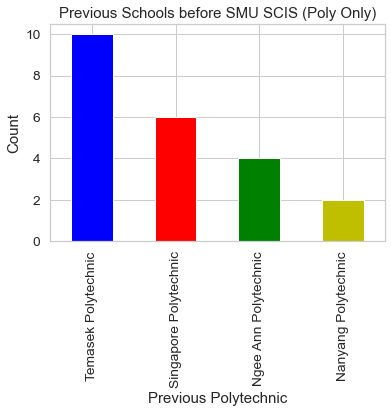

In [17]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(IS_SMU)))
IS_Poly.groupby(IS_Poly['school2'].dropna()).size().sort_values(ascending = False).plot(kind='bar', 
                                      color = my_colors, 
                                      title = 'Previous Schools before SMU SCIS (Poly Only)',
                                      xlabel = 'Previous Polytechnic',
                                      ylabel = 'Count')


# Most SMU SCIS students come from Temasek Polytechnic

<AxesSubplot:title={'center':'Diplomas (Poly Only)'}, xlabel='Diplomas', ylabel='Count'>

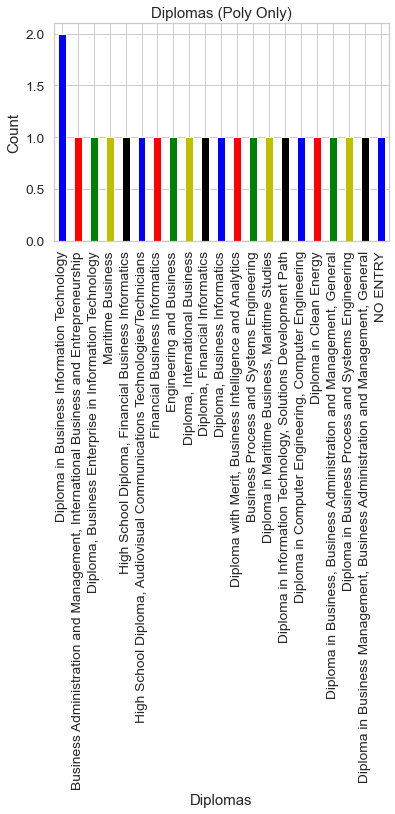

In [18]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(IS_SMU)))
IS_Poly.groupby(IS_Poly['schoolDegree2'].dropna()).size().sort_values(ascending = False).plot(kind='bar', 
                                      color = my_colors, 
                                      title = 'Diplomas (Poly Only)',
                                      xlabel = 'Diplomas',
                                      ylabel = 'Count')

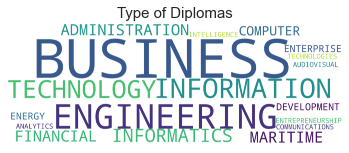

In [19]:
# What are the Diplomas taken my SMU SCIS Students who came from Poly?
stop_words = stopwords.words('english')
stop_words.extend(['diploma', 'in', 'school', 'studies', 'merit' , 'path', 
                   'general', 'entry', 'no', 'high', 'solutions', 'international', 
                   'management', 'technicians', 'systems', 'clean', 'process'])

dip_content = ''
for x in IS_Poly['schoolDegree2']:
    if len(x.strip()) > 0: # Eliminates empty answers
        dip_content += x.upper() + ' '    
        
# Create a word cloud
my_wordcloud = WordCloud(background_color='white', max_words = 20, stopwords = stop_words,
                     width=5500,
                     height=2000).generate(dip_content)

plt.imshow(my_wordcloud)
plt.axis('off')
plt.title('Type of Diplomas')
plt.show()

In [20]:
#stylecloud
stop_words = stopwords.words('english')
stop_words.extend(['diploma', 'in', 'school', 'studies', 'merit' , 'path', 
                   'general', 'entry', 'no', 'high', 'solutions', 'international', 
                   'management', 'technicians', 'systems', 'clean', 'process'])

stylecloud.gen_stylecloud(dip_content,
                          icon_name = 'fas fa-circle',
                          palette ='cartocolors.qualitative.Bold_8',
                          background_color = 'black',
                          output_name ='diplomas.png',
                          collocations = False,
                          custom_stopwords = stop_words)

### References ###
## icon_name: https://fontawesome.com/
## palette: https://jiffyclub.github.io/palettable/cartocolors/qualitative/

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


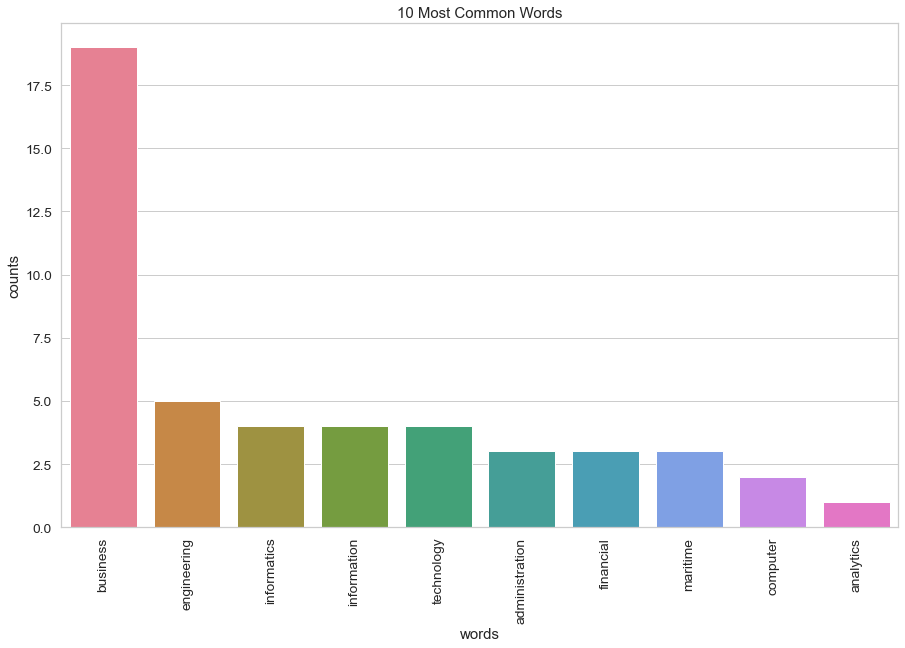

In [21]:
# Find out common words used together with Wordcloud
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

stop_words = stopwords.words('english')
stop_words.extend(['diploma', 'in', 'school', 'studies', 'merit' , 'path', 
                   'general', 'entry', 'no', 'high', 'solutions', 'international', 
                   'management', 'technicians', 'systems', 'clean', 'process'])

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 Most Common Words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=stop_words)

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(
    IS_Poly['schoolDegree2']
)

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [22]:
# JC DF
searchfor = ['Junior College', 'JC']
IS_JC = IS_SMU[IS_SMU['school2'].str.contains('|'.join(searchfor))]
IS_JC.shape

(22, 10)

In [23]:
IS_JC.head()

,headline,company,jobTitle,school,school2,allSkills,company2,jobTitle2,schoolDegree,schoolDegree2
3,ServiceNow Analyst at Nanyang Technological Un...,Institute of High Performance Computing (IHPC),Research Engineer,Singapore Management University,Anglo-Chinese Junior College,"Communication, Leadership, Adobe Illustrator, ...",Nanyang Technological University,ServiceNow Analyst,"Bachelor's degree, Smart-City Management and T...",NO ENTRY
4,Data Enthusiast | SMU Undergraduate | Smart Ci...,Conversion Hub,Project Intern,Singapore Management University,Temasek Junior College,"Python (Programming Language), Negotiation, Ac...",SingHealth,Patient Service Associate,"Bachelor of Science - BS, Smart City Managemen...",NO ENTRY
11,Final Year Information Systems undergraduate a...,Central Provident Fund Board,Customer Service Associate (Call Centre),Singapore Management University,Anderson Junior College,"Python (Programming Language), MySQL, Customer...",MacPherson Sheng Hong Childcare Centre,Assistant Teacher,"Bachelor of Science(Information Systems), Majo...",GCE 'A' Level
16,Data Scientist Intern at Fonterra,Fonterra,Data Scientist Intern,Singapore Management University,Serangoon Junior College,"Microsoft Office, Customer Service, Management...",SMUXploration Crew,Administrative,"Bachelor of Science - BS, Information Systems",Cambridge GCE A-Levels
18,Final Year Student at Singapore Management Uni...,Singapore Management University,Teaching Assistant for Digital Payments and In...,Singapore Management University,Saint Andrew's Junior College,"Python (Programming Language), PHP, SQL, Data ...",MobileLearners Pte Ltd,Fullstack Web Developer Intern,"Bachelor of Science - BS, Information Systems",NO ENTRY


<AxesSubplot:title={'center':'Previous Schools before SMU SCIS (JC Only)'}, xlabel='Previous Schools', ylabel='Count'>

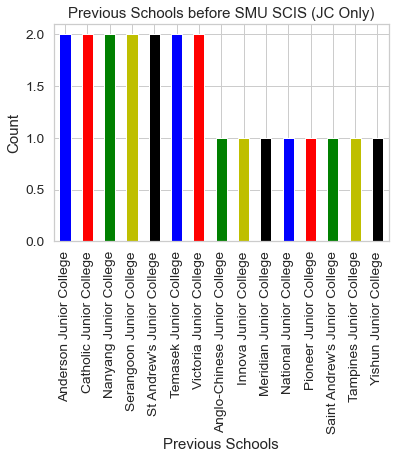

In [24]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(IS_SMU)))
IS_JC.groupby(IS_JC['school2'].dropna()).size().sort_values(ascending = False).plot(kind='bar', 
                                      color = my_colors, 
                                      title = 'Previous Schools before SMU SCIS (JC Only)',
                                      xlabel = 'Previous Schools',
                                      ylabel = 'Count')

<AxesSubplot:title={'center':'JC Combinations'}, xlabel='Previous Schools', ylabel='Count'>

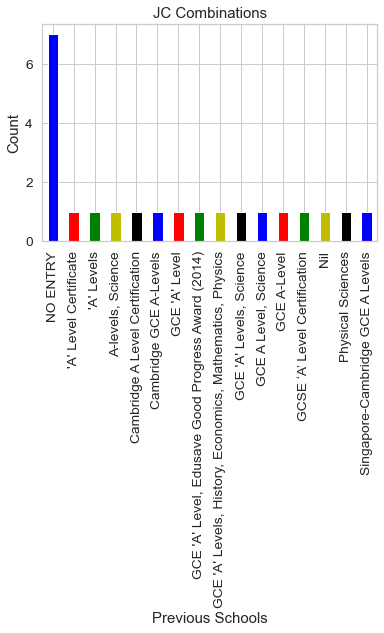

In [25]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(IS_SMU)))
IS_JC.groupby(IS_JC['schoolDegree2'].dropna()).size().sort_values(ascending = False).plot(kind='bar', 
                                      color = my_colors, 
                                      title = 'JC Combinations',
                                      xlabel = 'Previous Schools',
                                      ylabel = 'Count')

# Nothing of value-add here, will need to cross-reference with Typeform survey for JC Combinations